Landau Levels
Name: Jorge Villoldo Lozano
Date: October 8th, 2025
Using B = 1.0 T
Cyclotron frequency: ω_c = 1.759e+11 rad/s
Magnetic length: lB = 25.66 nm
Saved Landau_level_n18.png


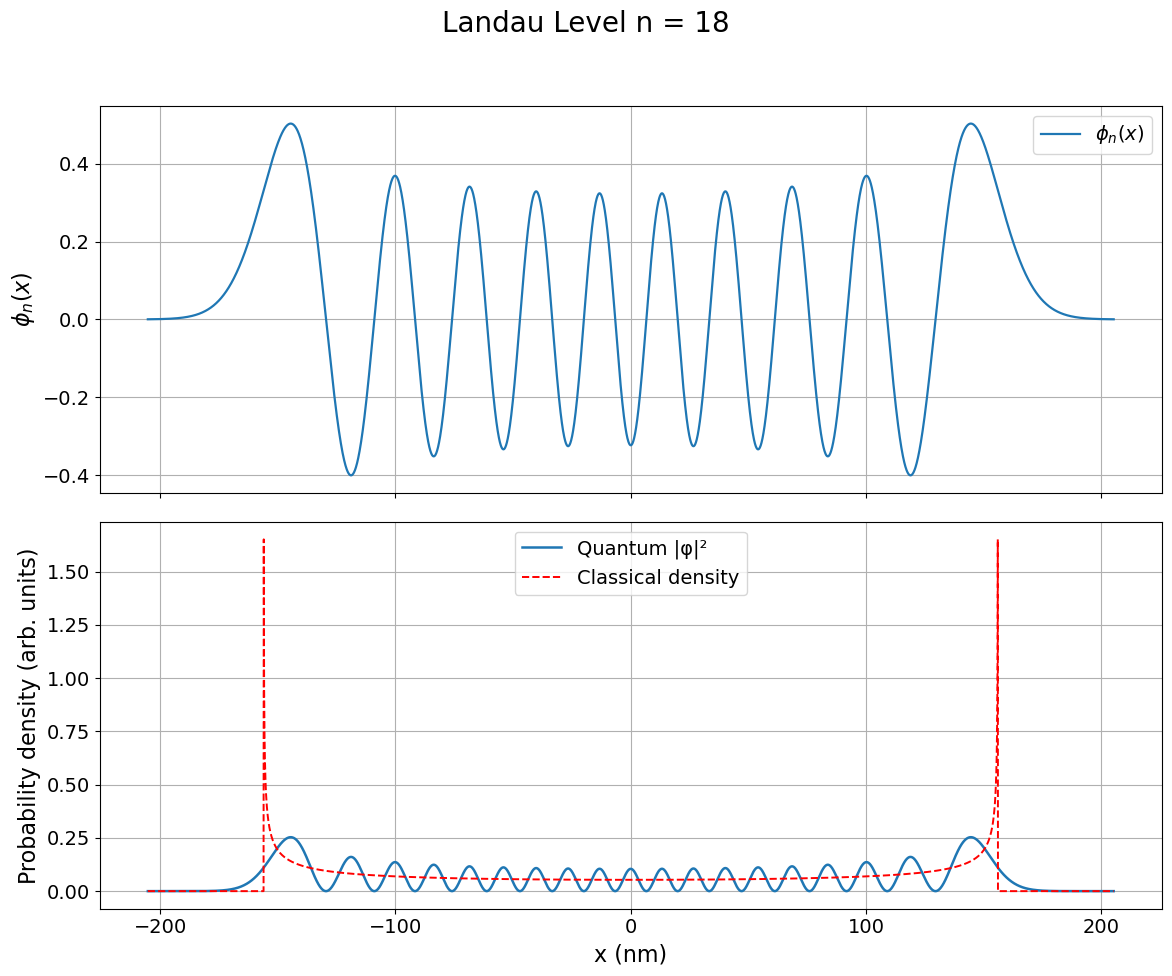

Saved Landau_level_n50.png


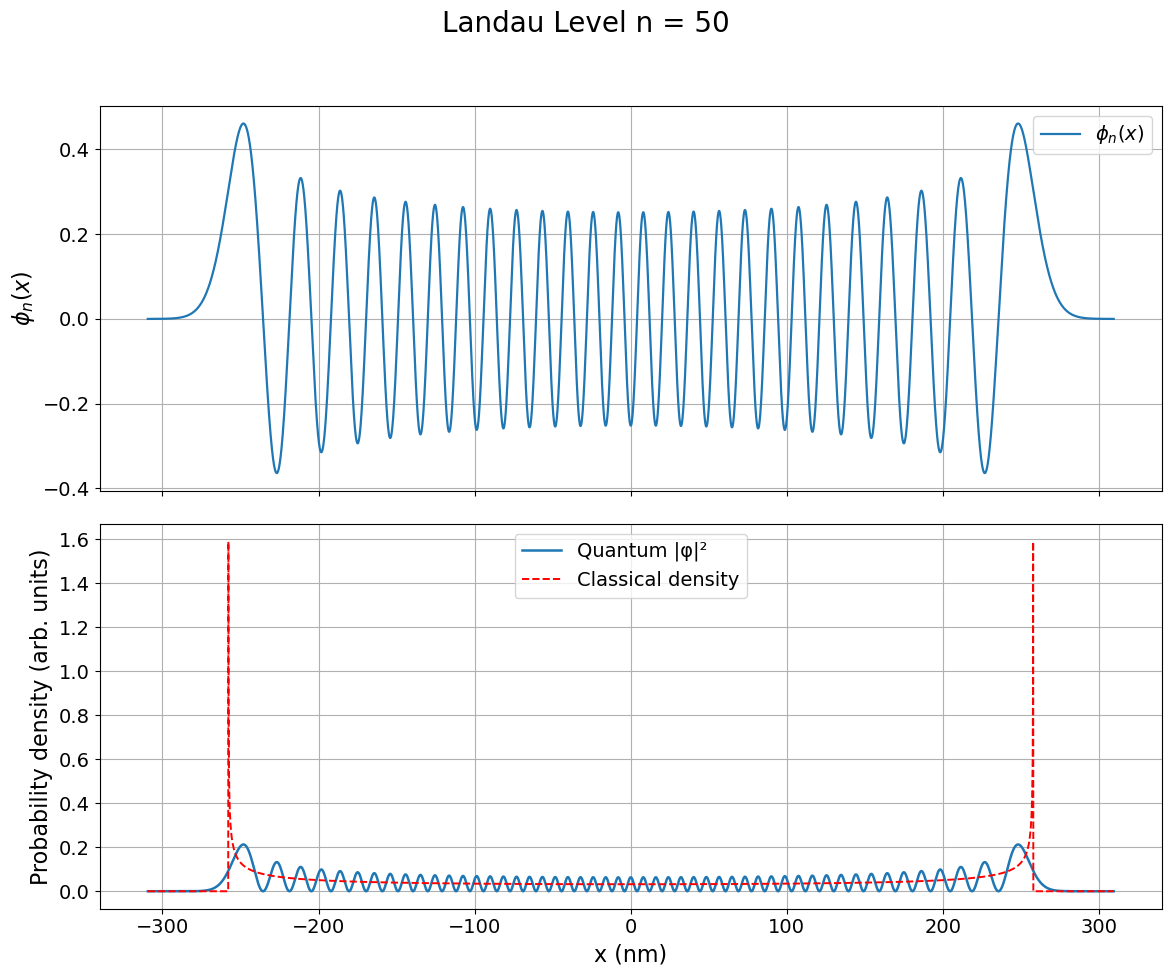

Saved Landau_level_n100.png


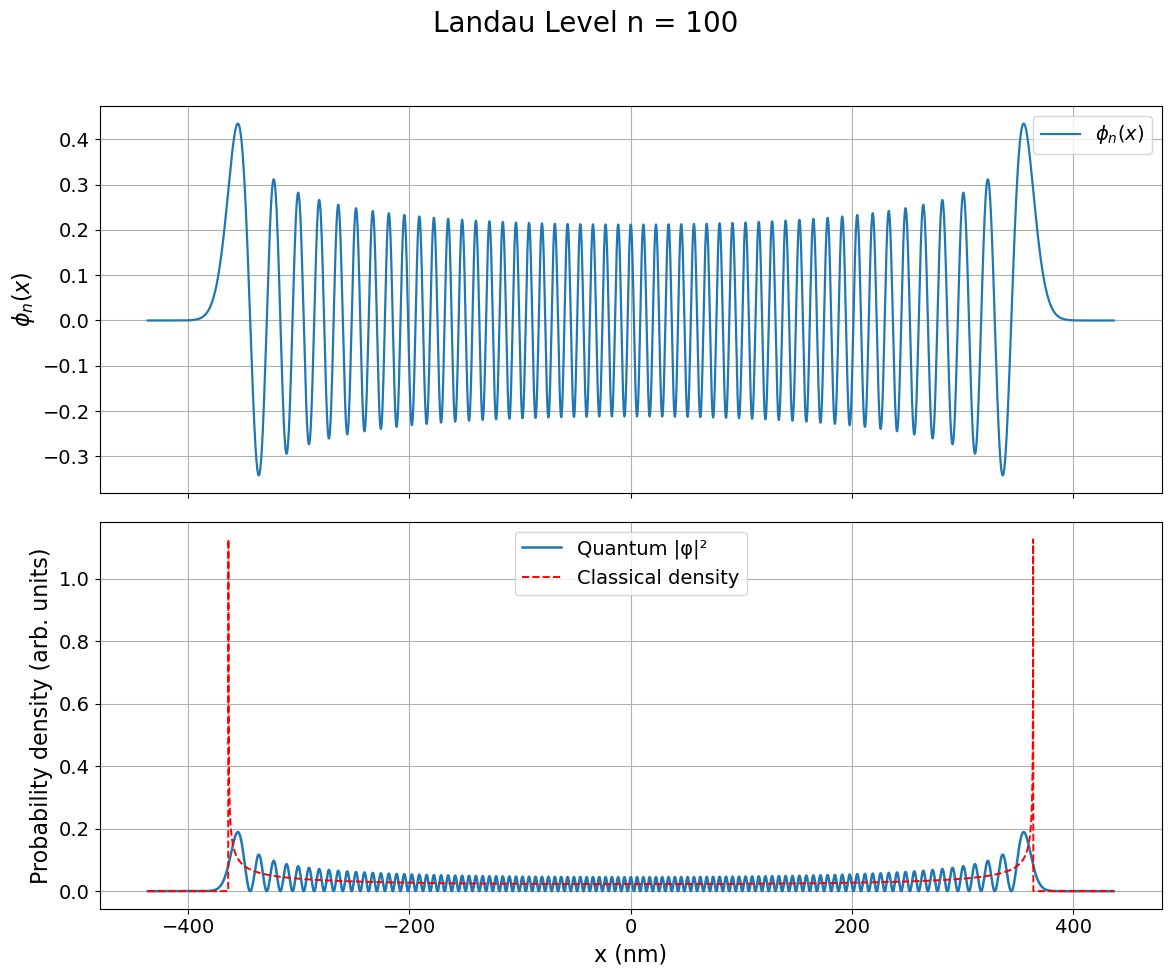

Saved Landau_comparison.png


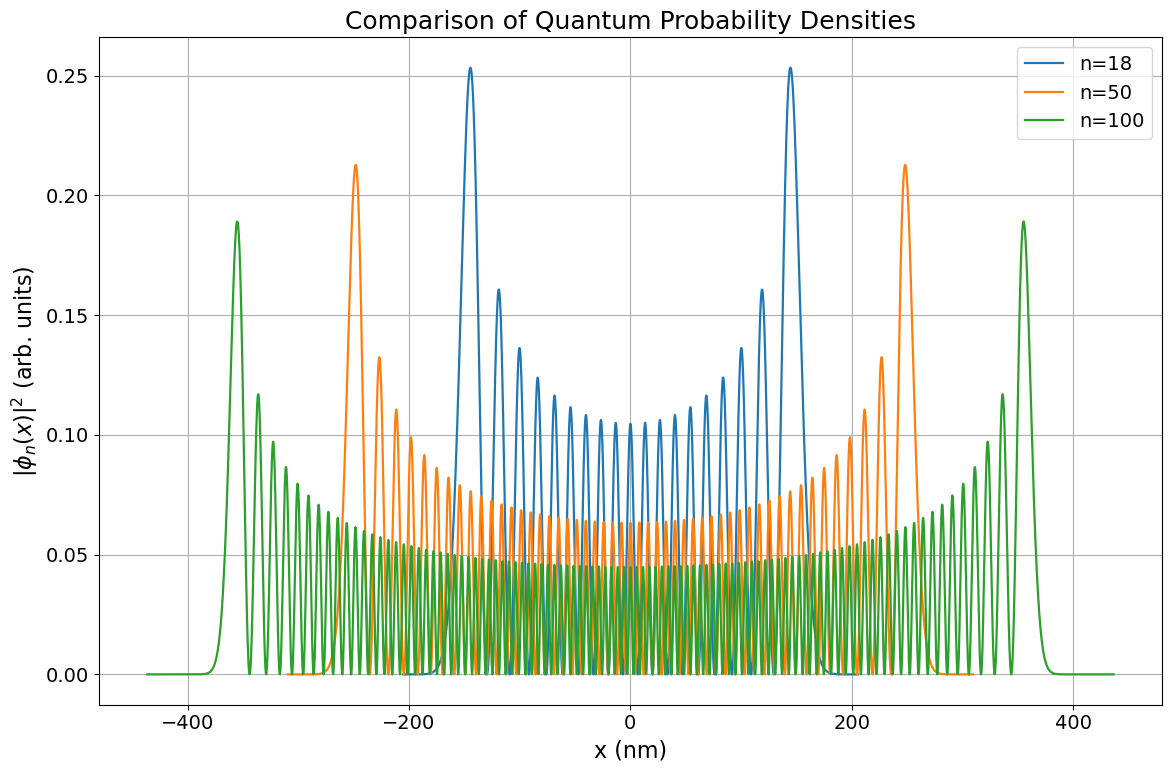

In [1]:
import numpy as np
import matplotlib.pyplot as plt


print("Landau Levels")
print("Name: Jorge Villoldo Lozano")
print("Date: October 8th, 2025")


# CONSTANTS
hbar = 1.054571817e-34    # J*s
e = 1.602176634e-19        # C
m_e = 9.10938356e-31       # kg
B = 1.0                    # Tesla

# PARAMETERS
omega_c = e * B / m_e                 # Cyclotron frequency (rad/s)
lB = np.sqrt(hbar / (m_e * omega_c))  # Magnetic length (m)

print(f"Using B = {B:.1f} T")
print(f"Cyclotron frequency: ω_c = {omega_c:.3e} rad/s")
print(f"Magnetic length: lB = {lB*1e9:.2f} nm")

# QUAMTUM LEVELS
levels = [18, 50, 100]

# HARMONIC OSCILLATOR FUNCTIONS
def phi0(xi):
    return np.pi**(-0.25) * np.exp(-0.5 * xi**2)

def phi1(xi):
    return np.sqrt(2.0) * xi * phi0(xi)

# RECURRENCE RELATION FOR HIGER WAVEFUNCTIONS
def compute_phi_n(n, xi):
    if n == 0:
        return phi0(xi)
    elif n == 1:
        return phi1(xi)
    phi_nm2 = phi0(xi)
    phi_nm1 = phi1(xi)
    for k in range(2, n + 1):
        coeff = np.sqrt(2.0 / k)
        phi_n = coeff * (xi * phi_nm1 - np.sqrt((k - 1) / 2.0) * phi_nm2)
        phi_nm2, phi_nm1 = phi_nm1, phi_n
    
    norm = np.trapz(np.abs(phi_n)**2, xi)   #NORMALIZE
    return phi_n / np.sqrt(norm)

# CLASSICAL PROBABILITY DENSITY
def classical_density(xi, n):
    """Normalized classical probability density for an oscillator."""
    A = np.sqrt(2 * (n + 0.5))
    dens = np.zeros_like(xi)
    inside = np.abs(xi) < A
    dens[inside] = 1.0 / (np.pi * np.sqrt(A**2 - xi[inside]**2))
    # Normalize numerically (should be already close to 1)
    dens /= np.trapz(dens, xi)
    return dens

# MATPLOTLIB SETTINGS
plt.rcParams.update({
    'font.size': 16,
    'axes.labelsize': 16,
    'axes.titlesize': 18,
    'legend.fontsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14
})

# LOOP OVER LANDAU LEVELS
for n in levels:
    xi_tp = np.sqrt(2 * n + 1)
    xi_max = max(8.0, 1.2 * xi_tp)
    xi = np.linspace(-xi_max, xi_max, 5000)
    x = xi * lB  # TO CONVERT IT TO METERS

    phi_n = compute_phi_n(n, xi)
    prob_q = np.abs(phi_n)**2
    prob_q /= np.trapz(prob_q, xi)
    prob_c = classical_density(xi, n)

    # PLOT
    fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
    fig.suptitle(f"Landau Level n = {n}", fontsize=20)

    # WAVEFUNCTION
    axes[0].plot(x / 1e-9, phi_n, lw=1.6, label=r"$\phi_n(x)$")
    axes[0].set_ylabel(r"$\phi_n(x)$")
    axes[0].grid(True)
    axes[0].legend()

    # PROBABILITY DENSITY VS CLASSICAL DENSITY
    axes[1].plot(x / 1e-9, prob_q, lw=1.8, label="Quantum |φ|²")
    axes[1].plot(x / 1e-9, prob_c, 'r--', lw=1.4, label="Classical density")
    axes[1].set_xlabel("x (nm)")
    axes[1].set_ylabel("Probability density (arb. units)")
    axes[1].grid(True)
    axes[1].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(f"Landau_level_n{n}.png", dpi=300)
    print(f"Saved Landau_level_n{n}.png")
    plt.show()

# COMPARISION PLOT FOR ALL N
plt.figure(figsize=(12, 8))
for n in levels:
    xi_tp = np.sqrt(2 * n + 1)
    xi_max = max(8.0, 1.2 * xi_tp)
    xi = np.linspace(-xi_max, xi_max, 4000)
    x = xi * lB
    phi_n = compute_phi_n(n, xi)
    prob_q = np.abs(phi_n)**2
    prob_q /= np.trapz(prob_q, xi)
    plt.plot(x / 1e-9, prob_q, lw=1.6, label=f"n={n}")

plt.xlabel("x (nm)")
plt.ylabel(r"$|\phi_n(x)|^2$ (arb. units)")
plt.title("Comparison of Quantum Probability Densities")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Landau_comparison.png", dpi=300)
print("Saved Landau_comparison.png")
plt.show()
